# Introduction to Synthetic Population Generation

In [1]:
from pathlib import Path

import pandas as pd

from caveat.data.synth import ActivityGen
from caveat.data.utils import generate_population, trace_to_pam
from caveat.describe.times import (
    joint_time_distributions_plot,
    times_distributions_plot,
)
from caveat.describe.transitions import sequence_prob_plot

In [ ]:
write_path = Path("tmp/synthetic_population.csv")

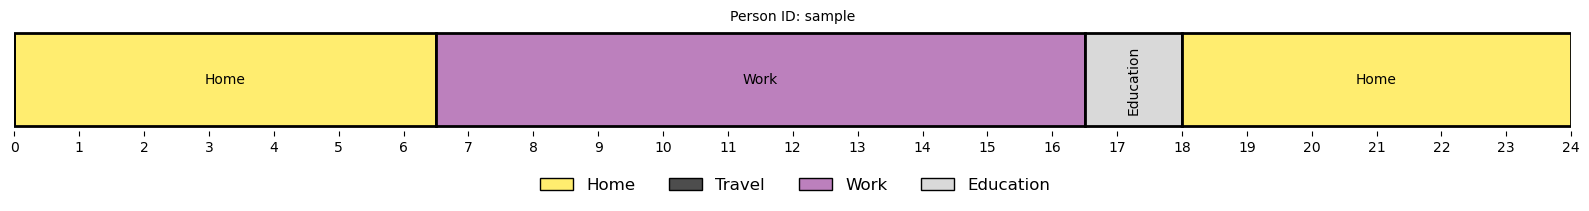

In [ ]:
# Example
generator = ActivityGen()
generator.build()

trace = generator.run()
plan = trace_to_pam(trace, generator.map)
plan.plot()

In [ ]:
population = generate_population(gen=generator, size=100)
population.act = population.act.map(generator.map)
population = population[["pid", "act", "start", "end", "duration"]]
population

,pid,act,start,end,duration
0,0,home,0,390,390
1,0,shop,390,405,15
2,0,work,405,945,540
3,0,shop,945,960,15
4,0,home,960,1440,480
...,...,...,...,...,...
512,98,home,1155,1440,285
513,99,home,0,405,405
514,99,work,405,930,525
515,99,leisure,930,1035,105


In [ ]:
write_path.parent.mkdir(exist_ok=True)
population.to_csv(write_path, index=False)

In [ ]:
def describe_col(population, col: str) -> pd.DataFrame:
    description = population.groupby("act")[col].describe()[
        ["count", "mean", "std", "min", "max"]
    ]
    description["attribute"] = col
    return description


def describe_cols(population, cols: list[str]) -> pd.DataFrame:
    description = pd.concat(
        [describe_col(population, c) for c in cols], ignore_index=False
    )
    description = description.reset_index().set_index(["attribute", "act"])
    return description


describe_cols(population, ["start", "end", "duration"]).round()

count   mean    std    min     max
attribute act                                          
start     education   45.0  830.0  209.0  420.0  1155.0
          home       224.0  569.0  518.0    0.0  1305.0
          leisure     57.0  808.0  298.0  375.0  1245.0
          shop        91.0  678.0  308.0  375.0  1185.0
          work       100.0  420.0   44.0  375.0   585.0
end       education   45.0  947.0  201.0  480.0  1170.0
          home       224.0  934.0  504.0  375.0  1440.0
          leisure     57.0  873.0  312.0  390.0  1305.0
          shop        91.0  707.0  303.0  390.0  1200.0
          work       100.0  925.0   71.0  765.0  1035.0
duration  education   45.0  118.0   52.0   15.0   240.0
          home       224.0  365.0   83.0   30.0   525.0
          leisure     57.0   65.0   23.0   15.0   135.0
          shop        91.0   30.0   18.0   15.0    75.0
          work       100.0  506.0   62.0  375.0   630.0

In [ ]:
def time_distributions(population: pd.DataFrame, mapping: dict):
    starts = {k: [] for k in mapping.values()}
    ends = {k: [] for k in mapping.values()}
    durations = {k: [] for k in mapping.values()}
    for act, acts in population.groupby("act"):
        starts[act] = list(acts.start)
        ends[act] = list(acts.end)
        durations[act] = list(acts.duration)
    return starts, ends, durations

In [ ]:
starts, ends, durations = time_distributions(population, generator.map)

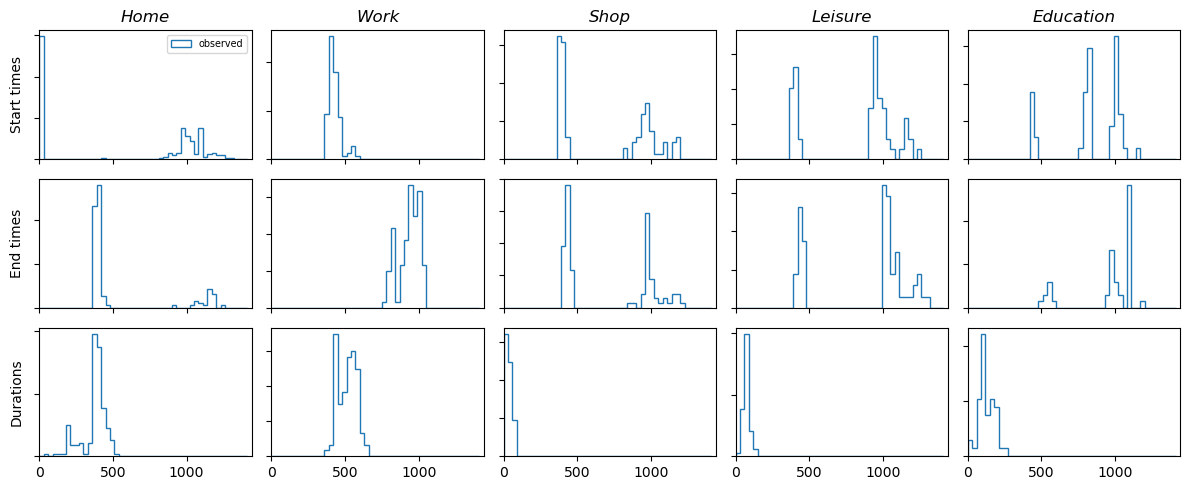

In [ ]:
_ = times_distributions_plot(population, ys={})

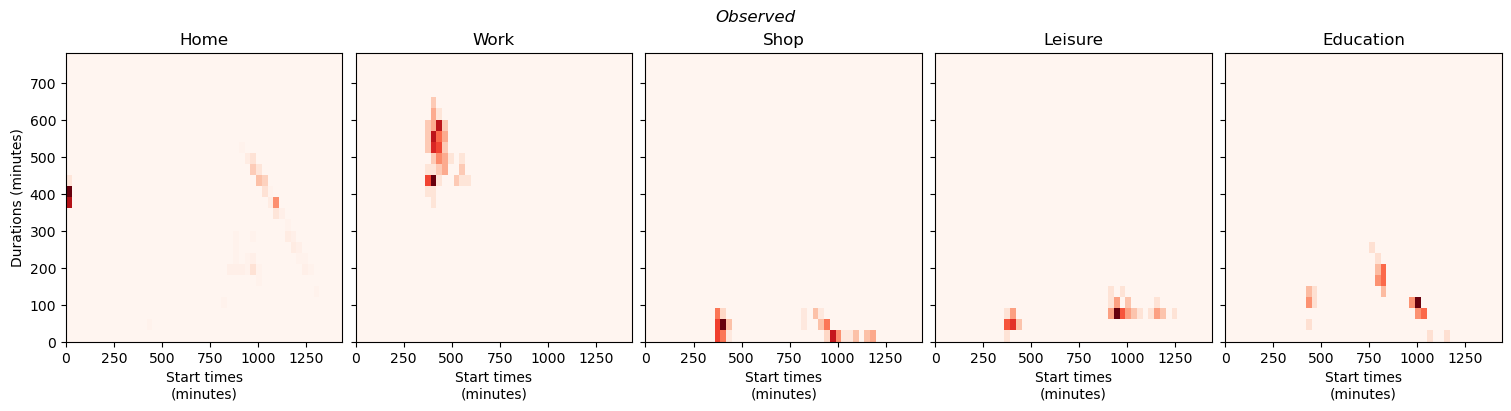

In [ ]:
_ = joint_time_distributions_plot(population, ys={})

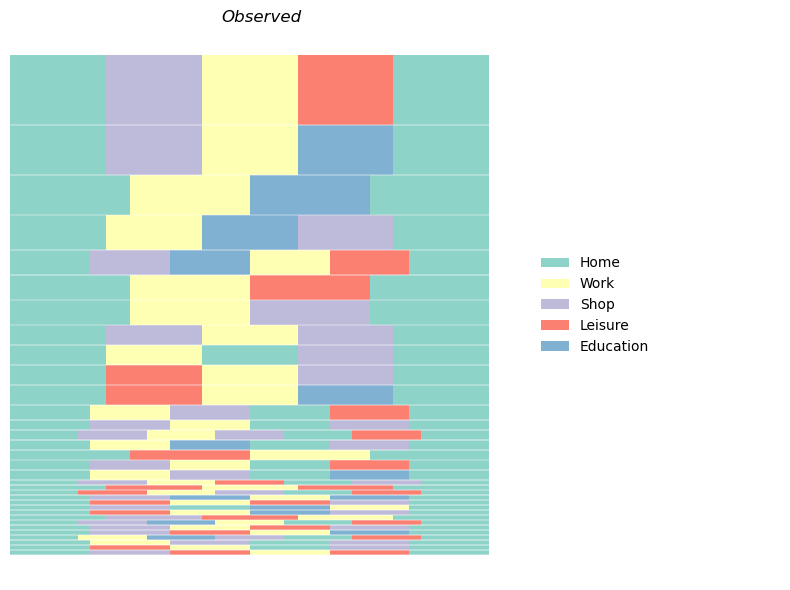

In [ ]:
_ = sequence_prob_plot(population, ys={}, figsize=(8, 6))